In [1]:
import scanpy as sc
import pandas as pd
from itertools import chain
from scipy.stats import fisher_exact
import numpy as np

In [2]:
adata = sc.read('./3.integrated.h5ad')
adata

AnnData object with n_obs × n_vars = 42169 × 8161
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'mt_outlier', 'genes_outlier', 'batch', '_scvi_batch', '_scvi_labels', 'leiden_res'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_scVI_MDE', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
aae_path = '/public21/home/sc90258/huangying/analysis/12.pan_mosquito/20250318_replot_mosq/aae/6.ann.h5ad'
alb_path = '/public21/home/sc90258/huangying/analysis/12.pan_mosquito/20250318_replot_mosq/alb/6.ann.h5ad'
cxtri_path = '/public21/home/sc90258/huangying/analysis/12.pan_mosquito/20250318_replot_mosq/cxtri/6.ann.h5ad'
cxpip_path = '/public21/home/sc90258/huangying/analysis/12.pan_mosquito/20250318_replot_mosq/cxpip/6.ann.h5ad'


aae = sc.read(aae_path)
aae.obs_names = [f'{i}-aae' for i in aae.obs_names]
aae.obs['cluster_name'] = aae.obs['cluster_name'].map(lambda x: f'{x}.aae')
alb = sc.read(alb_path)
alb.obs_names = [f'{i}-alb' for i in alb.obs_names]
alb.obs['cluster_name'] = alb.obs['cluster_name'].map(lambda x: f'{x}.alb')
cxtri = sc.read(cxtri_path)
cxtri.obs_names = [f'{i}-cxtri' for i in cxtri.obs_names]
cxtri.obs['cluster_name'] = cxtri.obs['cluster_name'].map(lambda x: f'{x}.cxtri')
cxpip = sc.read(cxpip_path)
cxpip.obs_names = [f'{i}-cxpip' for i in cxpip.obs_names]
cxpip.obs['cluster_name'] = cxpip.obs['cluster_name'].map(lambda x: f'{x}.cxpip')

In [4]:
pre_name = pd.concat(
    [aae.obs['cluster_name'], alb.obs['cluster_name'], cxtri.obs['cluster_name'], cxpip.obs['cluster_name']], axis=0
)
pre_name

CGATCGGTA_AACGTCCAA_AACAAGTGG-aae           ISC/EB.aae
CGCCAATGA_AACGTCCAA_AACAAGTGG-aae        EC-like-2.aae
TGCCTGATC_AACGTCCAA_AACAAGTGG-aae               EC.aae
GAGCAGCTT_ACACCAACG_AACAAGTGG-aae           ISC/EB.aae
TCCGTATCA_ACACCAACG_AACAAGTGG-aae           ISC/EB.aae
                                           ...        
TGTGGACACTTGCCGTCACTCTAACAC-cxpip    ISC/EB-prol.cxpip
TGTGGACACTTGCCGTCAGAGTGATCT-cxpip             VM.cxpip
TGTGGACACTTGCCGTCAGAGTTCGTC-cxpip             EC.cxpip
TGTGGACACTTGGTGACCCCGTGTCAA-cxpip         ISC/EB.cxpip
TGTGGACACTTGGTGACCGGAGAGGAA-cxpip      EC-like-2.cxpip
Name: cluster_name, Length: 42169, dtype: object

In [5]:
adata.obs['pre_name'] = pre_name
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,mt_outlier,genes_outlier,batch,_scvi_batch,_scvi_labels,leiden_res,pre_name
CGATCGGTA_AACGTCCAA_AACAAGTGG-aae,569,6.345636,1977.0,7.589841,31.917046,130.0,4.875197,6.575619,False,False,aae,0,0,1,ISC/EB.aae
CGCCAATGA_AACGTCCAA_AACAAGTGG-aae,322,5.777652,1095.0,6.999423,51.689498,63.0,4.158883,5.753425,False,False,aae,0,0,12,EC-like-2.aae
TGCCTGATC_AACGTCCAA_AACAAGTGG-aae,1783,7.486613,26283.0,10.176716,50.492714,1476.0,7.297768,5.615797,False,False,aae,0,0,5,EC.aae
GAGCAGCTT_ACACCAACG_AACAAGTGG-aae,478,6.171701,2028.0,7.615298,39.003945,235.0,5.463832,11.587771,False,False,aae,0,0,2,ISC/EB.aae
TCCGTATCA_ACACCAACG_AACAAGTGG-aae,1044,6.951772,7128.0,8.871926,34.904602,606.0,6.408529,8.501683,False,False,aae,0,0,16,ISC/EB.aae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGACACTTGCCGTCACTCTAACAC-cxpip,720,6.580639,2341.0,7.758760,25.715506,38.0,3.663562,1.623238,False,False,cxpip,3,0,6,ISC/EB-prol.cxpip
TGTGGACACTTGCCGTCAGAGTGATCT-cxpip,347,5.852202,1027.0,6.935370,33.787731,20.0,3.044523,1.947420,False,False,cxpip,3,0,17,VM.cxpip
TGTGGACACTTGCCGTCAGAGTTCGTC-cxpip,1147,7.045777,11729.0,9.369905,42.492966,395.0,5.981414,3.367721,False,False,cxpip,3,0,12,EC.cxpip
TGTGGACACTTGGTGACCCCGTGTCAA-cxpip,808,6.695799,3919.0,8.273847,27.915285,127.0,4.852030,3.240623,False,False,cxpip,3,0,2,ISC/EB.cxpip


In [6]:
adata.obs[adata.obs['pre_name'].isna()]

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,mt_outlier,genes_outlier,batch,_scvi_batch,_scvi_labels,leiden_res,pre_name


In [7]:
clust_prename_lst = adata.obs[['leiden_res', 'pre_name']].value_counts().reset_index().sort_values(['leiden_res', 'count'], ascending=False)
clust_prename_lst

,leiden_res,pre_name,count
146,19,EC-like-1.cxpip,33
156,19,EC.alb,27
166,19,EC.cxtri,20
168,19,EC-like-1.alb,19
206,19,EC.cxpip,10
...,...,...,...
389,0,VM.cxpip,1
394,0,HC.alb,1
481,0,EE-3.cxtri,1
482,0,EC-like-2.cxpip,1


In [8]:
clust_prename_lst.to_csv('./4.clust_prename_lst.csv', index=False)

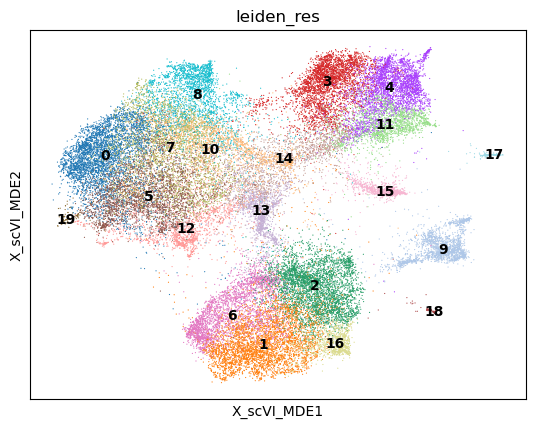

In [30]:
sc.pl.embedding(
    adata,
    basis="X_scVI_MDE",
    color=["leiden_res"],
    legend_loc="on data",
)

In [6]:
n_id = {
    'ISC/EB': ['2', '16'],
    'ISC/EB-prol': ['1', '6'],
    'Cardia-1': ['15'],
    'Cardia-2': ['3', '4', '11'],
    'EC': ['5', '7'],
    'EC-like-1': ['0', '19'],
    'EC-like-2': ['14', '13', '10', '8'],
    'EC-like-3': ['12'],
    'EE': ['9'],
    # 'EE-2': [''],
    # 'EE-3': [''],
    'VM': ['17'],
    'HC': ['18'],
}

In [46]:
sorted([int(i) for i in chain(*[i for i in n_id.values()]) if i != ''])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [7]:
id_n = {}
for k, v in n_id.items():
    for i in v:
        id_n[i] = k

id_n

{'2': 'ISC/EB',
 '16': 'ISC/EB',
 '1': 'ISC/EB-prol',
 '6': 'ISC/EB-prol',
 '15': 'Cardia-1',
 '3': 'Cardia-2',
 '4': 'Cardia-2',
 '11': 'Cardia-2',
 '5': 'EC',
 '7': 'EC',
 '0': 'EC-like-1',
 '19': 'EC-like-1',
 '14': 'EC-like-2',
 '13': 'EC-like-2',
 '10': 'EC-like-2',
 '8': 'EC-like-2',
 '12': 'EC-like-3',
 '9': 'EE',
 '17': 'VM',
 '18': 'HC'}

In [49]:
adata.obs['cluster'] = adata.obs['leiden_res'].map(
    lambda x: id_n[x] if x in id_n.keys() else x)

In [50]:
adata.obs['cluster'].unique()

array(['ISC/EB-prol', 'EC-like-3', 'EC', 'ISC/EB', 'Cardia-2', 'Cardia-1',
       'EC-like-1', 'EE', 'EC-like-2', 'HC', 'VM'], dtype=object)

In [52]:
adata.obs['cluster_name'] = adata.obs['cluster']
adata.obs['cluster_name'] = adata.obs['cluster_name'].astype('category')
adata.obs['cluster_name'] = adata.obs[
        'cluster_name'
    ].cat.reorder_categories(list(n_id.keys()), ordered=True)

adata.obs['cluster_name'].unique()

['ISC/EB-prol', 'EC-like-3', 'EC', 'ISC/EB', 'Cardia-2', ..., 'EC-like-1', 'EE', 'EC-like-2', 'HC', 'VM']
Length: 11
Categories (11, object): ['ISC/EB' < 'ISC/EB-prol' < 'Cardia-1' < 'Cardia-2' ... 'EC-like-3' < 'EE' < 'VM' < 'HC']

In [59]:
adata.obsm['X_scVI_MDE']

array([[-0.13774978, -1.5562817 ],
       [-0.5190453 , -0.11320829],
       [-1.1457891 , -0.21854243],
       ...,
       [-1.7725062 , -0.2954087 ],
       [ 0.27575564, -1.2339606 ],
       [ 0.26413074,  0.41989467]], dtype=float32)

In [61]:
adata.obsm['X_umap']

array([[11.226592 ,  3.5050728],
       [12.362515 ,  9.232961 ],
       [13.862665 , 10.209183 ],
       ...,
       [15.336204 , 11.301894 ],
       [ 9.9736185,  4.7453113],
       [ 9.507519 ,  8.71509  ]], dtype=float32)

In [56]:
adata.write('4.ann.h5ad')

In [3]:
adata = sc.read('4.ann.h5ad')

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

matplotlib.use('cairo')

fig, ax = plt.subplots(figsize=(8, 7))

# c = sns.color_palette('deep')
# set1 = sns.color_palette('Set1')
# set2 = sns.color_palette('Set2')
# def get_c(lst):
#     rc = ["#a4cde1","#67a4cc","#277fb8","#549da3","#96cb8f","#8bc96d","#4dae47","#5c9e43","#b79973","#f38989","#ec5051","#e32427","#ef6a45","#f9b769","#f9a341","#f48521","#ee8e46","#d4a6a8","#af93c4","#8660a8","#815e99","#c6b598","#f6f28f","#d4a55b","#b05a28"]
#     c = []
#     for i in lst:
#         c.append(rc[i])
#     return c.copy()
c = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD",
    "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", 
    "#8B008B", "#FF4500"] # "#17BECF", "#FFD700", "#00CED1", 
cells = ['ISC/EB', 'ISC/EB-prol', 'Cardia-1', 'Cardia-2', 'EC', 'EC-like-1', 'EC-like-2', 'EC-like-3', 'EE', 'VM', 'HC'] # 'EE-2', 'EE-3', 'FBC', 

umap = pd.DataFrame(
    adata.obsm['X_scVI_MDE'], 
    columns=['umap1', 'umap2'],
    index=adata.obs.index
)

grp_color = {k:v for k, v in zip(cells, c)}

for lb in n_id.keys():
    pdf = umap[adata.obs['cluster_name'] == lb]
    l1, = ax.plot(
        pdf['umap1'], pdf['umap2'], '.', color=grp_color[lb],
        alpha=0.6, ms=1.5, clip_on = False)

x = -2; y = -2

ax.arrow(
    x, y, 0, .6, 
    width=0.005, head_width=0.06, overhang=0.07, 
    color='k', zorder=10)
ax.arrow(
    x, y, .6, 0, 
    width=0.005, head_width=0.06, overhang=0.07,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(x+0.3, y-0.05, 'UMAP-1', ha='center', va='top')
ax.text(x-0.05, y+0.3, 'UMAP-2', ha='right', va='center', rotation=90)

for i, (cell, color) in enumerate(grp_color.items()):
    x = 2.3; y = -0.6
    sep = 20
    j = i // sep

    ax.plot(x + j * 4.5, y - (i % sep) * 0.12, '.', color=color, mec=color, ms=11, alpha=0.9, clip_on = False)
    ax.text(x + j * 4.5 + 0.05, y - (i % sep) * 0.12, 
    f'{cell}: {len(adata.obs[adata.obs["cluster_name"] == cell])}', 
    ha='left', va='center', clip_on = False, fontsize=10)

# plt.savefig('./plots/f2.clust.umap_merge.png', dpi=600, bbox_inches='tight')
plt.savefig('4.umap.pdf', bbox_inches='tight')
plt.close()

In [4]:
adata.obs['batch']

CGATCGGTA_AACGTCCAA_AACAAGTGG-aae      aae
CGCCAATGA_AACGTCCAA_AACAAGTGG-aae      aae
TGCCTGATC_AACGTCCAA_AACAAGTGG-aae      aae
GAGCAGCTT_ACACCAACG_AACAAGTGG-aae      aae
TCCGTATCA_ACACCAACG_AACAAGTGG-aae      aae
                                     ...  
TGTGGACACTTGCCGTCACTCTAACAC-cxpip    cxpip
TGTGGACACTTGCCGTCAGAGTGATCT-cxpip    cxpip
TGTGGACACTTGCCGTCAGAGTTCGTC-cxpip    cxpip
TGTGGACACTTGGTGACCCCGTGTCAA-cxpip    cxpip
TGTGGACACTTGGTGACCGGAGAGGAA-cxpip    cxpip
Name: batch, Length: 42169, dtype: category
Categories (4, object): ['aae', 'alb', 'cxtri', 'cxpip']

In [11]:
for batch in ['aae', 'alb', 'cxtri', 'cxpip']:

    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.patheffects as PathEffects
    import seaborn as sns

    matplotlib.use('cairo')

    fig, ax = plt.subplots(figsize=(8, 7))

    tmp_adata = adata[adata.obs['batch'] == batch]

    # c = sns.color_palette('deep')
    # set1 = sns.color_palette('Set1')
    # set2 = sns.color_palette('Set2')
    # def get_c(lst):
    #     rc = ["#a4cde1","#67a4cc","#277fb8","#549da3","#96cb8f","#8bc96d","#4dae47","#5c9e43","#b79973","#f38989","#ec5051","#e32427","#ef6a45","#f9b769","#f9a341","#f48521","#ee8e46","#d4a6a8","#af93c4","#8660a8","#815e99","#c6b598","#f6f28f","#d4a55b","#b05a28"]
    #     c = []
    #     for i in lst:
    #         c.append(rc[i])
    #     return c.copy()
    c = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD",
        "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", 
        "#8B008B", "#FF4500"] # "#17BECF", "#FFD700", "#00CED1", 
    cells = ['ISC/EB', 'ISC/EB-prol', 'Cardia-1', 'Cardia-2', 'EC', 'EC-like-1', 'EC-like-2', 'EC-like-3', 'EE', 'VM', 'HC'] # 'EE-2', 'EE-3', 'FBC', 

    umap = pd.DataFrame(
        tmp_adata.obsm['X_scVI_MDE'], 
        columns=['umap1', 'umap2'],
        index=tmp_adata.obs.index
    )

    grp_color = {k:v for k, v in zip(cells, c)}

    for lb in n_id.keys():
        pdf = umap[tmp_adata.obs['cluster_name'] == lb]
        l1, = ax.plot(
            pdf['umap1'], pdf['umap2'], '.', color=grp_color[lb],
            alpha=0.6, ms=1.5, clip_on = False)

    x = -2; y = -2

    ax.arrow(
        x, y, 0, .6, 
        width=0.005, head_width=0.06, overhang=0.07, 
        color='k', zorder=10)
    ax.arrow(
        x, y, .6, 0, 
        width=0.005, head_width=0.06, overhang=0.07,
        color='k', zorder=10)

    ax.set_axis_off()

    ax.text(x+0.3, y-0.05, 'UMAP-1', ha='center', va='top')
    ax.text(x-0.05, y+0.3, 'UMAP-2', ha='right', va='center', rotation=90)

    for i, (cell, color) in enumerate(grp_color.items()):
        x = 2.3; y = -0.6
        sep = 20
        j = i // sep

        ax.plot(x + j * 4.5, y - (i % sep) * 0.12, '.', color=color, mec=color, ms=11, alpha=0.9, clip_on = False)
        ax.text(x + j * 4.5 + 0.05, y - (i % sep) * 0.12, 
        f'{cell}: {len(tmp_adata.obs[tmp_adata.obs["cluster_name"] == cell])}', 
        ha='left', va='center', clip_on = False, fontsize=10)

    # plt.savefig('./plots/f2.clust.umap_merge.png', dpi=600, bbox_inches='tight')
    plt.savefig(f'4.umap.{batch}.pdf', bbox_inches='tight')
    plt.close()

In [12]:
pdf = adata.obs[['batch', 'cluster_name']].value_counts().reset_index()

def sum_ct(df):
    df['sum'] = df['count'].sum()
    df['cellular percentage (%)'] = df['count'] / df['sum'] * 100
    df['cellular percentage (%)'] = df['cellular percentage (%)'].map(lambda x: round(x, 2))
    return df    

pdf = pdf.groupby(['batch']).apply(sum_ct)
pdf

/tmp/ipykernel_79521/761387135.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pdf = pdf.groupby(['batch']).apply(sum_ct)
/tmp/ipykernel_79521/761387135.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pdf = pdf.groupby(['batch']).apply(sum_ct)


batch cluster_name  count    sum  cellular percentage (%)
batch                                                              
aae   2     aae  ISC/EB-prol   2466   9239                    26.69
      8     aae           EC   1713   9239                    18.54
      10    aae    EC-like-1   1290   9239                    13.96
      14    aae     Cardia-2   1092   9239                    11.82
      17    aae    EC-like-2    977   9239                    10.57
      19    aae           EE    778   9239                     8.42
      27    aae       ISC/EB    431   9239                     4.67
      30    aae    EC-like-3    262   9239                     2.84
      33    aae     Cardia-1    209   9239                     2.26
      41    aae           HC     13   9239                     0.14
      42    aae           VM      8   9239                     0.09
alb   0     alb     Cardia-2   5632  17538                    32.11
      1     alb    EC-like-2   3673  17538                    20.94
      6     alb       ISC/EB   1877  17538                    10.70
      7     alb           EC   1802  17538                    10.27
      9     alb    EC-like-1   1356  17538                     7.73
      13    alb  ISC/EB-prol   1108  17538                     6.32
      21    alb     Cardia-1    646  17538                     3.68
      22    alb           EE    626  17538                     3.57
      24    alb    EC-like-3    583  17538                     3.32
      35    alb           VM    125  17538                     0.71
      36    alb           HC    110  17538                     0.63
cxtri 12  cxtri  ISC/EB-prol   1182   5548                    21.30
      16  cxtri           EC    997   5548                    17.97
      18  cxtri     Cardia-2    958   5548                    17.27
      23  cxtri    EC-like-2    596   5548                    10.74
      25  cxtri    EC-like-1    526   5548                     9.48
      26  cxtri           EE    445   5548                     8.02
      29  cxtri       ISC/EB    299   5548                     5.39
      31  cxtri    EC-like-3    240   5548                     4.33
      32  cxtri     Cardia-1    217   5548                     3.91
      37  cxtri           VM     46   5548                     0.83
      38  cxtri           HC     42   5548                     0.76
cxpip 3   cxpip  ISC/EB-prol   2184   9844                    22.19
      4   cxpip       ISC/EB   2149   9844                    21.83
      5   cxpip    EC-like-2   1892   9844                    19.22
      11  cxpip           EC   1210   9844                    12.29
      15  cxpip    EC-like-1   1038   9844                    10.54
      20  cxpip     Cardia-2    716   9844                     7.27
      28  cxpip    EC-like-3    400   9844                     4.06
      34  cxpip           EE    193   9844                     1.96
      39  cxpip           VM     33   9844                     0.34
      40  cxpip     Cardia-1     23   9844                     0.23
      43  cxpip           HC      6   9844                     0.06

In [17]:
adata.obs['batch'].unique()

['aae', 'alb', 'cxtri', 'cxpip']
Categories (4, object): ['aae', 'alb', 'cxtri', 'cxpip']

In [18]:
cell_stat = adata.obs[['cluster_name', 'batch']].value_counts(['cluster_name', 'batch']).reset_index()
cell_stat = cell_stat.pivot(index='batch', columns='cluster_name', values='count')
cell_stat = cell_stat.loc[adata.obs['batch'].unique(), :]
cell_stat = cell_stat.fillna(0)

cell_stat['total'] = cell_stat.sum(axis=1)

for i in n_id.keys():
    cell_stat[f'{i} percent (%)'] = cell_stat[i] / cell_stat['total'] * 100
cell_stat = cell_stat.reset_index()

cell_stat

cluster_name,batch,ISC/EB,ISC/EB-prol,Cardia-1,Cardia-2,EC,EC-like-1,EC-like-2,EC-like-3,EE,...,ISC/EB-prol percent (%),Cardia-1 percent (%),Cardia-2 percent (%),EC percent (%),EC-like-1 percent (%),EC-like-2 percent (%),EC-like-3 percent (%),EE percent (%),VM percent (%),HC percent (%)
0,aae,431,2466,209,1092,1713,1290,977,262,778,...,26.691200,2.262150,11.819461,18.540968,13.962550,10.574738,2.835805,8.420825,0.086589,0.140708
1,alb,1877,1108,646,5632,1802,1356,3673,583,626,...,6.317710,3.683430,32.113126,10.274832,7.731782,20.943095,3.324210,3.569392,0.712738,0.627209
2,cxtri,299,1182,217,958,997,526,596,240,445,...,21.304975,3.911319,17.267484,17.970440,9.480894,10.742610,4.325883,8.020908,0.829128,0.757030
3,cxpip,2149,2184,23,716,1210,1038,1892,400,193,...,22.186103,0.233645,7.273466,12.291751,10.544494,19.219829,4.063389,1.960585,0.335230,0.060951


In [26]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib
import seaborn as sns

matplotlib.use('cairo')

x = adata.obs['batch'].unique()

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(4, 5.5))

    # c = sns.color_palette('deep')
    c = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD",
    "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", 
    "#8B008B", "#00CED1", "#FF4500"]

    last_pct = np.array([100, 100, 100, 100])
    for i, color in zip(cell_stat.columns[-len(n_id.keys()):], c):
        sns.barplot(
            y=list(last_pct), 
            x=x, 
            color=color, 
            alpha=0.9, 
            order=x,
            width=0.7
        )
        last_pct = last_pct - cell_stat[i].values

    plt.ylabel('Cell Number percent (%)')

    sns.despine(top=True, right=True, bottom=True, left=True, trim=1)

    plt.savefig('4.stack_plot.pdf', bbox_inches='tight')
plt.close()

In [2]:
adata = sc.read('./4.ann.h5ad')

In [5]:
adata.obs['pre_cluster_name'] = adata.obs['pre_name'].map(lambda x: x.split('.')[0])
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,mt_outlier,genes_outlier,batch,_scvi_batch,_scvi_labels,leiden_res,pre_name,cluster,cluster_name,pre_cluster_name
CGATCGGTA_AACGTCCAA_AACAAGTGG-aae,569,6.345636,1977.0,7.589841,31.917046,130.0,4.875197,6.575619,False,False,aae,0,0,1,ISC/EB.aae,ISC/EB-prol,ISC/EB-prol,ISC/EB
CGCCAATGA_AACGTCCAA_AACAAGTGG-aae,322,5.777652,1095.0,6.999423,51.689498,63.0,4.158883,5.753425,False,False,aae,0,0,12,EC-like-2.aae,EC-like-3,EC-like-3,EC-like-2
TGCCTGATC_AACGTCCAA_AACAAGTGG-aae,1783,7.486613,26283.0,10.176716,50.492714,1476.0,7.297768,5.615797,False,False,aae,0,0,5,EC.aae,EC,EC,EC
GAGCAGCTT_ACACCAACG_AACAAGTGG-aae,478,6.171701,2028.0,7.615298,39.003945,235.0,5.463832,11.587771,False,False,aae,0,0,2,ISC/EB.aae,ISC/EB,ISC/EB,ISC/EB
TCCGTATCA_ACACCAACG_AACAAGTGG-aae,1044,6.951772,7128.0,8.871926,34.904602,606.0,6.408529,8.501683,False,False,aae,0,0,16,ISC/EB.aae,ISC/EB,ISC/EB,ISC/EB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGACACTTGCCGTCACTCTAACAC-cxpip,720,6.580639,2341.0,7.758760,25.715506,38.0,3.663562,1.623238,False,False,cxpip,3,0,6,ISC/EB-prol.cxpip,ISC/EB-prol,ISC/EB-prol,ISC/EB-prol
TGTGGACACTTGCCGTCAGAGTGATCT-cxpip,347,5.852202,1027.0,6.935370,33.787731,20.0,3.044523,1.947420,False,False,cxpip,3,0,17,VM.cxpip,VM,VM,VM
TGTGGACACTTGCCGTCAGAGTTCGTC-cxpip,1147,7.045777,11729.0,9.369905,42.492966,395.0,5.981414,3.367721,False,False,cxpip,3,0,12,EC.cxpip,EC-like-3,EC-like-3,EC
TGTGGACACTTGGTGACCCCGTGTCAA-cxpip,808,6.695799,3919.0,8.273847,27.915285,127.0,4.852030,3.240623,False,False,cxpip,3,0,2,ISC/EB.cxpip,ISC/EB,ISC/EB,ISC/EB


In [10]:
# write umap plot data
umap = pd.DataFrame(
    adata.obsm['X_umap'], 
    columns=['umap1', 'umap2'],
    index=adata.obs.index
)

umap_lb = pd.concat([umap, adata.obs[['batch', 'pre_cluster_name']]], axis=1)
umap_lb.index.name = 'barcode'

umap_lb.to_csv('4.umap_lb.4mosq_merge.csv')

In [6]:
import pandas as pd

umap = pd.read_csv('4.umap_lb.4mosq_merge.csv')
cell_count = umap.value_counts(['batch', 'pre_cluster_name']).reset_index()
cell_count.to_csv('./4.cell_count.csv', index=False)